In [83]:
import os
import math
from collections import Counter, defaultdict
import numpy as np
import re
from nltk import ngrams


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


In [94]:

# Function to tokenize a document
def tokenize_document(document):
    words = [word.strip('“”“!"#&\'()*+,-./:;<=>?@[\\]^_`{|}~') for word in document.split()]
    words = [word for word in words if word]
    return words

# Function to generate n-grams from a list of tokens
def generate_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngram = " ".join(tokens[i:i+n])
        ngrams.append(ngram)
    return ngrams

# Function to tokenize all txt documents in the specified directory
def tokenize_dataset(directory):
    all_tokens = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r', encoding='utf-8') as file:
                text = file.read()
                tokens = tokenize_document(text)
                all_tokens.extend(tokens)
    return all_tokens

# Function to calculate token and type frequency
def calculate_frequency(tokens):
    token_freq = Counter(tokens)
    types = len(token_freq)
    tokens_count = sum(token_freq.values())
    return types, tokens_count, token_freq

# Function to calculate perplexity
def calculate_perplexity(directory, n):
    tokens = tokenize_dataset(directory)
    ngrams = generate_ngrams(tokens, n)
    token_freq = Counter(ngrams)

    # Calculate the total number of n-grams
    total_ngrams = len(ngrams)
    
    # Calculate the sum of log probabilities for all n-grams
    log_prob_sum = sum(math.log(token_freq[gram] / total_ngrams, 2) for gram in token_freq)
    
    perplexity = math.pow(2, - (1 / total_ngrams) * log_prob_sum)
    return perplexity



# Main function
def main():
    directory = "/Users/sokratbashirov/Desktop/NLP/Proj"
    tokens = tokenize_dataset(directory)
    types, tokens_count, token_freq = calculate_frequency(tokens)
    print("Number of types:", types)
    print("Number of tokens:", tokens_count)
    print("Token frequency:")
    for token, freq in token_freq.most_common(10): 
        print(f"{token}: {freq}")

    vocabulary_size = len(set(tokens))

    n = 1  
    ngrams = generate_ngrams(tokens, n)
    print("\n Unigrams and their frequencies:")
    for gram, freq in Counter(ngrams).most_common(10):
        print(f"{gram}: {freq}")

    n = 2  
    ngrams = generate_ngrams(tokens, n)
    print("\n Bigrams and their frequencies:")
    for gram, freq in Counter(ngrams).most_common(10): 
        print(f"{gram}: {freq}")

    n = 3  
    ngrams = generate_ngrams(tokens, n)
    print("\n Trigrams and their frequencies:")
    for gram, freq in Counter(ngrams).most_common(10):
        print(f"{gram}: {freq}")

    
    n=1
    perplexity = calculate_perplexity(directory, n)
    print(f"\nPerplexity of {n}-grams:", perplexity)
    n=2
    perplexity = calculate_perplexity(directory, n)
    print(f"\nPerplexity of {n}-grams:", perplexity)
    n=3
    perplexity = calculate_perplexity(directory, n)
    print(f"\nPerplexity of {n}-grams:", perplexity)



if __name__ == "__main__":
    main()


Number of types: 7098
Number of tokens: 50538
Token frequency:
və: 1557
üçün: 494
•: 446
–: 410
2: 334
istifadə: 282
ilə: 277
3: 272
saat: 268
1: 254

 Unigrams and their frequencies:
və: 1557
üçün: 494
•: 446
–: 410
2: 334
istifadə: 282
ilə: 277
3: 272
saat: 268
1: 254

 Bigrams and their frequencies:
yarım ildə: 116
Intel Core: 110
illik –: 90
və s: 86
proqram təminatı: 81
və ya: 76
iş prinsipi: 75
II yarım: 66
illik təhsil: 60
təhsil müddətində: 60

 Trigrams and their frequencies:
illik təhsil müddətində: 60
I yarım ildə: 60
II yarım ildə: 56
nəsil Intel Core: 50
saat II yarım: 48
illik – 2: 48
– 2 saat: 48
kurs I yarım: 44
Sistem proqram təminatı: 39
Kompüter üzrə operator: 36

Perplexity of 1-grams: 3.820433140848835

Perplexity of 2-grams: 30.027552066924066

Perplexity of 3-grams: 52.229218363085565


In [97]:
# Function to calculate unigram probabilities with Laplace smoothing
def calculate_unigram_prob_laplace(tokens, token_freq):
    vocabulary_size = len(set(tokens))
    unigram_prob = {token: (freq + 1) / (len(tokens) + vocabulary_size) for token, freq in token_freq.items()}
    return unigram_prob

# Function to calculate unigram probabilities with Interpolation smoothing
def calculate_unigram_prob_interpolation(tokens, token_freq):
    total_tokens = sum(token_freq.values())
    unigram_prob = {token: freq / total_tokens for token, freq in token_freq.items()}
    return unigram_prob

# Function to calculate unigram probabilities with Backoff smoothing
def calculate_unigram_prob_backoff(tokens, token_freq, alpha):
    total_tokens = sum(token_freq.values())
    unigram_prob = {token: (freq - alpha) / total_tokens for token, freq in token_freq.items()}
    return unigram_prob

# Function to calculate unigram probabilities with Kneser-Ney smoothing
def calculate_unigram_prob_kneser_ney(tokens, token_freq):
    total_tokens = sum(token_freq.values())
    continuation_count = defaultdict(int)
    for token in token_freq:
        if token_freq[token] > 0:
            continuation_count[token] += 1
    discount = 0.75
    unigram_prob = {token: max(freq - discount, 0) / total_tokens for token, freq in token_freq.items()}
    return unigram_prob


# Function to calculate perplexity
def calculate_perplexity(probabilities, ngrams):
    log_prob_sum = sum(math.log(probabilities[ngram], 2) for ngram in ngrams)
    perplexity = math.pow(2, - (1 / len(ngrams)) * log_prob_sum)
    return perplexity



In [99]:
# Main function
def main():
    directory = "/Users/sokratbashirov/Desktop/NLP/Proj"
    
    tokens = tokenize_dataset(directory)
    types, tokens_count, token_freq = calculate_frequency(tokens)
    
    unigram_prob_laplace = calculate_unigram_prob_laplace(tokens, token_freq)
    
    unigram_prob_interpolation = calculate_unigram_prob_interpolation(tokens, token_freq)
    
    alpha = 0.1  # Choose a suitable value for alpha
    unigram_prob_backoff = calculate_unigram_prob_backoff(tokens, token_freq, alpha)
    
    unigram_prob_kneser_ney = calculate_unigram_prob_kneser_ney(tokens, token_freq)
    
    n = 1
    ngrams = generate_ngrams(tokens, n)
    perplexity_laplace = calculate_perplexity(unigram_prob_laplace, ngrams)
    print(f"Perplexity of unigrams with Laplace smoothing: {perplexity_laplace}")
    
    perplexity_interpolation = calculate_perplexity(unigram_prob_interpolation, ngrams)
    print(f"Perplexity of unigrams with Interpolation smoothing: {perplexity_interpolation}")
    
    perplexity_backoff = calculate_perplexity(unigram_prob_backoff, ngrams)
    print(f"Perplexity of unigrams with Backoff smoothing: {perplexity_backoff}")
    
    perplexity_kneser_ney = calculate_perplexity(unigram_prob_kneser_ney, ngrams)
    print(f"Perplexity of unigrams with Kneser-Ney smoothing: {perplexity_kneser_ney}")

if __name__ == "__main__":
    main()


Perplexity of unigrams with Laplace smoothing: 2487.2614282456684
Perplexity of unigrams with Interpolation smoothing: 2461.529311292195
Perplexity of unigrams with Backoff smoothing: 2496.9871358489504
Perplexity of unigrams with Kneser-Ney smoothing: 2786.046007382344


In [100]:
def calculate_unigram_prob_laplace(tokens, token_freq):
    vocabulary_size = len(set(tokens))
    unigram_prob = {token: (freq + 1) / (len(tokens) + vocabulary_size) for token, freq in token_freq.items()}
    return unigram_prob

def calculate_unigram_prob_interpolation(tokens, token_freq):
    total_tokens = sum(token_freq.values())
    unigram_prob = {token: freq / total_tokens for token, freq in token_freq.items()}
    return unigram_prob

def calculate_unigram_prob_backoff(tokens, token_freq, alpha):
    total_tokens = sum(token_freq.values())
    unigram_prob = {token: (freq - alpha) / total_tokens for token, freq in token_freq.items()}
    return unigram_prob

def calculate_unigram_prob_kneser_ney(tokens, token_freq):
    total_tokens = sum(token_freq.values())
    continuation_count = defaultdict(int)
    for token in token_freq:
        if token_freq[token] > 0:
            continuation_count[token] += 1
    discount = 0.75
    unigram_prob = {token: max(freq - discount, 0) / total_tokens for token, freq in token_freq.items()}
    return unigram_prob

def calculate_bigram_prob_laplace(tokens, token_freq, bigram_freq):
    vocabulary_size = len(set(tokens))
    bigram_prob = {}
    for bigram in bigram_freq:
        token1, token2 = bigram.split()
        bigram_prob[bigram] = (bigram_freq[bigram] + 1) / (token_freq[token1] + vocabulary_size)
    return bigram_prob

def calculate_bigram_prob_interpolation(tokens, token_freq, bigram_freq):
    total_tokens = sum(token_freq.values())
    bigram_prob = {}
    for bigram in bigram_freq:
        token1, token2 = bigram.split()
        bigram_prob[bigram] = bigram_freq[bigram] / total_tokens
    return bigram_prob

def calculate_bigram_prob_backoff(tokens, token_freq, bigram_freq, unigram_prob_backoff, alpha):
    total_tokens = sum(token_freq.values())
    bigram_prob = {}
    for bigram in bigram_freq:
        token1, token2 = bigram.split()
        bigram_prob[bigram] = (bigram_freq[bigram] - alpha) / token_freq[token1]
    return bigram_prob

def calculate_bigram_prob_kneser_ney(tokens, token_freq, bigram_freq, unigram_prob_kneser_ney):
    total_tokens = sum(token_freq.values())
    continuation_count = defaultdict(int)
    for bigram in bigram_freq:
        token1, token2 = bigram.split()
        continuation_count[token1] += 1
    discount = 0.75
    bigram_prob = {}
    for bigram in bigram_freq:
        token1, token2 = bigram.split()
        bigram_prob[bigram] = max(bigram_freq[bigram] - discount, 0) / continuation_count[token1]
    return bigram_prob

def calculate_trigram_prob_laplace(tokens, token_freq, bigram_freq, trigram_freq):
    vocabulary_size = len(set(tokens))
    trigram_prob = {}
    for trigram in trigram_freq:
        bigram, token3 = trigram.rsplit(' ', 1)
        trigram_prob[trigram] = (trigram_freq[trigram] + 1) / (bigram_freq[bigram] + vocabulary_size)
    return trigram_prob

def calculate_trigram_prob_interpolation(tokens, token_freq, bigram_freq, trigram_freq):
    total_tokens = sum(token_freq.values())
    trigram_prob = {}
    for trigram in trigram_freq:
        bigram, token3 = trigram.rsplit(' ', 1)
        trigram_prob[trigram] = trigram_freq[trigram] / total_tokens
    return trigram_prob

def calculate_trigram_prob_backoff(tokens, token_freq, bigram_freq, trigram_freq, bigram_prob_backoff, alpha):
    total_tokens = sum(token_freq.values())
    trigram_prob = {}
    for trigram in trigram_freq:
        bigram, token3 = trigram.rsplit(' ', 1)
        trigram_prob[trigram] = (trigram_freq[trigram] - alpha) / bigram_freq[bigram]
    return trigram_prob

def calculate_trigram_prob_kneser_ney(tokens, token_freq, bigram_freq, trigram_freq, bigram_prob_kneser_ney):
    total_tokens = sum(token_freq.values())
    continuation_count = defaultdict(int)
    for trigram in trigram_freq:
        bigram, token3 = trigram.rsplit(' ', 1)
        continuation_count[bigram] += 1
    discount = 0.75
    trigram_prob = {}
    for trigram in trigram_freq:
        bigram, token3 = trigram.rsplit(' ', 1)
        trigram_prob[trigram] = max(trigram_freq[trigram] - discount, 0) / continuation_count[bigram]
    return trigram_prob

def calculate_perplexity(probabilities, ngrams):
    log_prob_sum = sum(math.log(probabilities[ngram], 2) for ngram in ngrams)
    perplexity = math.pow(2, - (1 / len(ngrams)) * log_prob_sum)
    return perplexity


def main():
    directory = "/Users/sokratbashirov/Desktop/NLP/Proj"
    
    tokens = tokenize_dataset(directory)
    types, tokens_count, token_freq = calculate_frequency(tokens)
    
    bigrams = generate_ngrams(tokens, 2)
    trigrams = generate_ngrams(tokens, 3)
    
    unigram_prob_laplace = calculate_unigram_prob_laplace(tokens, token_freq)
    
    unigram_prob_interpolation = calculate_unigram_prob_interpolation(tokens, token_freq)
    
    alpha = 0.1  
    unigram_prob_backoff = calculate_unigram_prob_backoff(tokens, token_freq, alpha)
    
    unigram_prob_kneser_ney = calculate_unigram_prob_kneser_ney(tokens, token_freq)
    
    bigram_freq = Counter(bigrams)
    bigram_prob_laplace = calculate_bigram_prob_laplace(tokens, token_freq, bigram_freq)
    
    bigram_prob_interpolation = calculate_bigram_prob_interpolation(tokens, token_freq, bigram_freq)
    
    bigram_prob_backoff = calculate_bigram_prob_backoff(tokens, token_freq, bigram_freq, unigram_prob_backoff, alpha)
    
    bigram_prob_kneser_ney = calculate_bigram_prob_kneser_ney(tokens, token_freq, bigram_freq, unigram_prob_kneser_ney)
    
    trigram_freq = Counter(trigrams)
    trigram_prob_laplace = calculate_trigram_prob_laplace(tokens, token_freq, bigram_freq, trigram_freq)
    
    trigram_prob_interpolation = calculate_trigram_prob_interpolation(tokens, token_freq, bigram_freq, trigram_freq)
    
    trigram_prob_backoff = calculate_trigram_prob_backoff(tokens, token_freq, bigram_freq, trigram_freq, bigram_prob_backoff, alpha)
    
    trigram_prob_kneser_ney = calculate_trigram_prob_kneser_ney(tokens, token_freq, bigram_freq, trigram_freq, bigram_prob_kneser_ney)
    
    perplexity_laplace_bigram = calculate_perplexity(bigram_prob_laplace, bigrams)
    print(f"Perplexity of bigrams with Laplace smoothing: {perplexity_laplace_bigram}")
    
    perplexity_interpolation_bigram = calculate_perplexity(bigram_prob_interpolation, bigrams)
    print(f"Perplexity of bigrams with Interpolation smoothing: {perplexity_interpolation_bigram}")
    
    perplexity_backoff_bigram = calculate_perplexity(bigram_prob_backoff, bigrams)
    print(f"Perplexity of bigrams with Backoff smoothing: {perplexity_backoff_bigram}")
    
    perplexity_kneser_ney_bigram = calculate_perplexity(bigram_prob_kneser_ney, bigrams)
    print(f"Perplexity of bigrams with Kneser-Ney smoothing: {perplexity_kneser_ney_bigram}")
    
    perplexity_laplace_trigram = calculate_perplexity(trigram_prob_laplace, trigrams)
    print(f"Perplexity of trigrams with Laplace smoothing: {perplexity_laplace_trigram}")
    
    perplexity_interpolation_trigram = calculate_perplexity(trigram_prob_interpolation, trigrams)
    print(f"Perplexity of trigrams with Interpolation smoothing: {perplexity_interpolation_trigram}")
    
    perplexity_backoff_trigram = calculate_perplexity(trigram_prob_backoff, trigrams)
    print(f"Perplexity of trigrams with Backoff smoothing: {perplexity_backoff_trigram}")
    
    perplexity_kneser_ney_trigram = calculate_perplexity(trigram_prob_kneser_ney, trigrams)
    print(f"Perplexity of trigrams with Kneser-Ney smoothing: {perplexity_kneser_ney_trigram}")

if __name__ == "__main__":
    main()


Perplexity of bigrams with Laplace smoothing: 1382.0321939228852
Perplexity of bigrams with Interpolation smoothing: 12891.57474193483
Perplexity of bigrams with Backoff smoothing: 5.423953916345979
Perplexity of bigrams with Kneser-Ney smoothing: 2.1450550912291875
Perplexity of trigrams with Laplace smoothing: 1694.386785609431
Perplexity of trigrams with Interpolation smoothing: 16674.882838764384
Perplexity of trigrams with Backoff smoothing: 1.3468560495152666
Perplexity of trigrams with Kneser-Ney smoothing: 0.6291519410448994


In [88]:
df = pd.read_csv('oxu_az_500_000.csv')
df[['content','category']]

,content,category
0,Mərakeşdə dağıntılar altında yeni doğulmuş kör...,Dünya
1,“İdalia” tropik qasırğası Kubanın qərb əyaləti...,Dünya
2,Bizim WhatsApp kanalımıza buradan abunə ola bi...,Siyasət
3,Dağlıq ərazidə itkin düşmüş şəxslər tapılıblar...,Cəmiyyət
4,"Bir gündür ki, Azərbaycan Qızıl Aypara Cəmiyyə...",Cəmiyyət
...,...,...
15566,Bizim WhatsApp kanalımıza buradan abunə ola bi...,Cəmiyyət
15567,Bizim WhatsApp kanalımıza buradan abunə ola bi...,Cəmiyyət
15568,Bizim WhatsApp kanalımıza buradan abunə ola bi...,Siyasət
15569,Bizim WhatsApp kanalımıza buradan abunə ola bi...,Cəmiyyət


In [89]:
# Task3: Naive_Bayes 

X = df['content']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred = nb_model.predict(X_test_tfidf)

print("Classification Report:")
print(classification_report(y_test, y_pred,zero_division=1))


Classification Report:
              precision    recall  f1-score   support

   Avto-Moto       1.00      0.00      0.00         2
  CinemaPlus       1.00      0.00      0.00         3
    Cəmiyyət       0.67      0.87      0.75       906
       Dünya       0.89      0.51      0.65       580
    Kriminal       1.00      0.00      0.00        49
     Maraqlı       1.00      0.00      0.00        32
    Müharibə       1.00      0.00      0.00        63
  Mədəniyyət       1.00      0.00      0.00        45
     Siyasət       0.62      0.93      0.74       851
      Turizm       1.00      0.00      0.00         8
         İKT       1.00      0.00      0.00        16
       İdman       0.98      0.83      0.90       344
İqtisadiyyat       0.95      0.12      0.22       171
  Şou-biznes       1.00      0.00      0.00        45

    accuracy                           0.70      3115
   macro avg       0.94      0.23      0.23      3115
weighted avg       0.77      0.70      0.65      3115



In [32]:
df = pd.read_csv('oxu_az_500_000.csv')

X = df['content']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 3)) 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred = nb_model.predict(X_test_tfidf)

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


Classification Report:
              precision    recall  f1-score   support

   Avto-Moto       1.00      0.00      0.00         2
  CinemaPlus       1.00      0.00      0.00         3
    Cəmiyyət       0.66      0.87      0.75       906
       Dünya       0.90      0.66      0.76       580
    Kriminal       1.00      0.00      0.00        49
     Maraqlı       1.00      0.00      0.00        32
    Müharibə       0.82      0.14      0.24        63
  Mədəniyyət       1.00      0.00      0.00        45
     Siyasət       0.66      0.93      0.77       851
      Turizm       1.00      0.00      0.00         8
         İKT       1.00      0.00      0.00        16
       İdman       1.00      0.74      0.85       344
İqtisadiyyat       0.97      0.18      0.31       171
  Şou-biznes       1.00      0.00      0.00        45

    accuracy                           0.72      3115
   macro avg       0.93      0.25      0.26      3115
weighted avg       0.78      0.72      0.69      3115



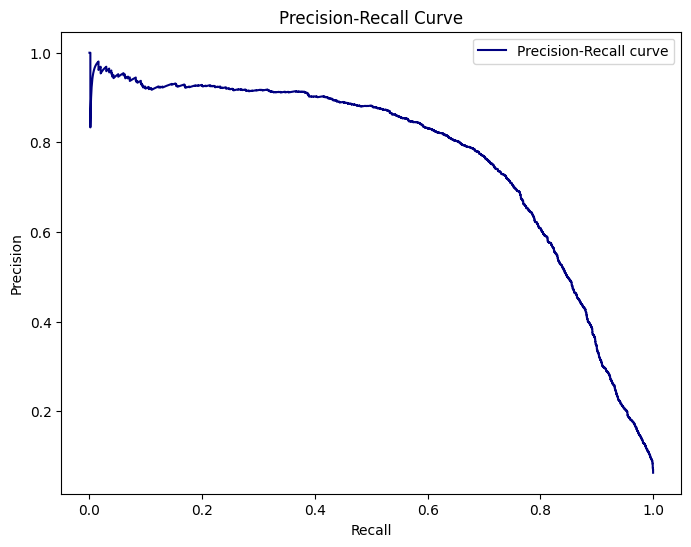

In [91]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_pred_prob.ravel())
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='navy', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


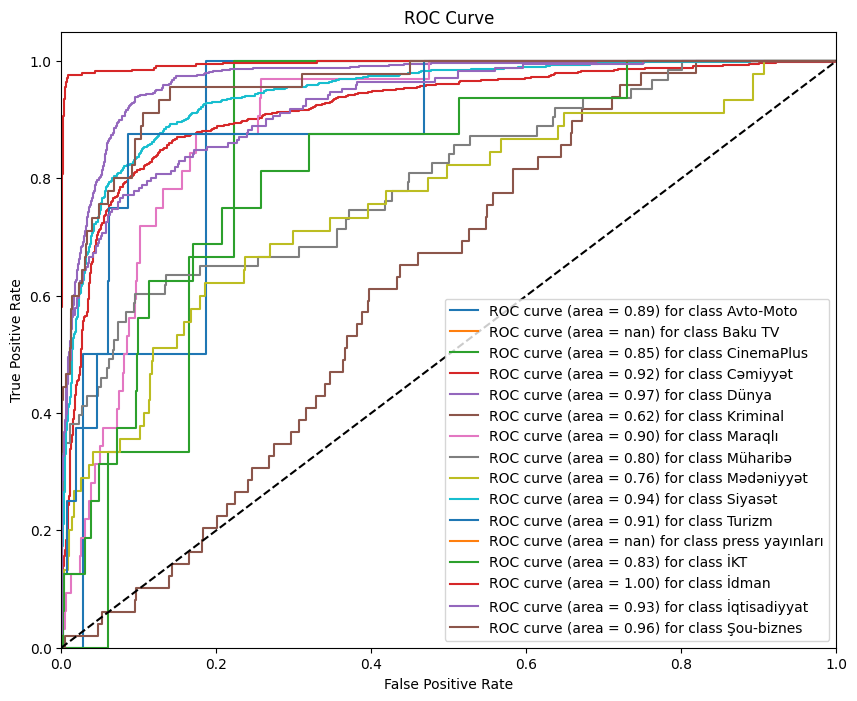

In [92]:
y_test_bin = label_binarize(y_test, classes=nb_model.classes_)
y_pred_prob = nb_model.predict_proba(X_test_tfidf)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(nb_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(len(nb_model.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], nb_model.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
